In [9]:
import sympy as sp
from sympy.abc import m,n,k,x,y

sp.init_printing()
%matplotlib inline
%config InlineBackend.figure = "retina"

# Math HW 2B -- Green's Function

## 1.3 Hands on 🙌

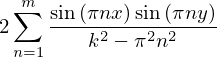

In [5]:
λ = sp.symbols("λ")

# construct your green's function
eigen_functions_mul = sp.sin(n * sp.pi * y) * sp.sin(n * sp.pi * x) \
    / (k**2 - n**2 * sp.pi**2)
greens_function     = 2 * sp.Sum(eigen_functions_mul, (n, 1, m))
greens_function

Substitution of variables

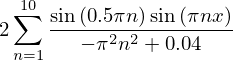

In [7]:
# substitution in SymPy ... as easy as using a dictionary
greens_function_1 = greens_function.subs({
    y : 0.5,
    k : 0.2, 
    m : 10   # n = 1 ~ 10
})
greens_function_1

Ordinary plots, through `matplotlib`

/Users/cicero/anaconda/envs/viper/lib/python3.6/site-packages/sympy/plotting/experimental_lambdify.py:232: UserWarning: The evaluation of the expression is problematic. We are trying a failback method that may still work. Please report this as a bug.
  warnings.warn('The evaluation of the expression is'


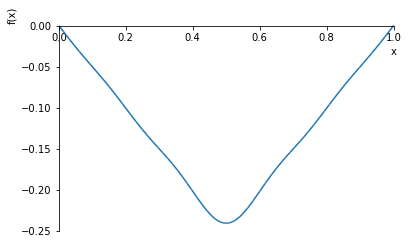

In [11]:
# Sympy plot automatically integrate the matplotlib function
sp.plot(greens_function_1, (x, 0, 1));

Sympy is very proud of their self-sufficiency design. It is Python-based and lightweight <font size=-2>(SymPy only depends on mpmath, a pure Python library for arbitrary floating point arithmetic, making it easy to use -- Quoted from Sympy)</font>. 

It means it should has its own plotting design! Let's see.  

In [19]:
# plotting in Sympy
sp.textplot(greens_function_1, 0, 1)

      0 |  \                                                    /
        |   \                                                  / 
        |    ..                                              ..  
        |      \                                            /    
        |       ..                                        ..     
        |         \                                      /       
        |          ..                                  ..        
        |            \                                /          
-0.1201 | ------------..----------------------------..-----------
        |               \                          /             
        |                ..                      ..              
        |                  \                    /                
        |                   ..                ..                 
        |                     \              /                   
        |                      \            /                    
        | 

Cuuuute! 🤩🤩🤩

### Exploration n

In [22]:
def plot_helper(y, k, m):
    # construct your green's function
    eigen_functions_mul = sp.sin(n * sp.pi * y) * sp.sin(n * sp.pi * x) \
        / (k**2 - n**2 * sp.pi**2)
    greens_function     = 2 * sp.Sum(eigen_functions_mul, (n, 1, m))
    
    sp.textplot(
        greens_function.subs({
            y : y,
            k : k, 
            m : m  
        }),
        0, 1
    )

In [54]:
from ipywidgets import interact
import ipywidgets as widgets

interact(
    plot_helper, 
    y=0.5,
    k=0.2,
    m=widgets.IntSlider(min=1, max=100, step=1, value=10),
)

interactive(children=(FloatSlider(value=0.5, description='y', max=1.5, min=-0.5), FloatSlider(value=0.2, description='k', max=0.6000000000000001, min=-0.2), IntSlider(value=10, description='m', min=1), Output()), _dom_classes=('widget-interact',))

<function __main__.plot_helper(y, k, m)>

In [ ]:
%%writefile greens_eigen_series.py
import sympy as sp
from sympy.abc import m,n,k,x,y
import argparse

λ = sp.symbols("λ")

def plot_helper(y, k, m):
    # construct your green's function
    eigen_functions_mul = sp.sin(n * sp.pi * y) * sp.sin(n * sp.pi * x) \
        / (k**2 - n**2 * sp.pi**2)
    greens_function     = 2 * sp.Sum(eigen_functions_mul, (n, 1, m))
    
    sp.textplot(
        greens_function.subs({
            y : y,
            k : k, 
            m : m  
        }),
        0, 1
    )
    
if __name__ == "__main__":
    parser = argparse.ArgumentParser()
    parser.add_argument("-y", type=float)
    parser.add_argument("-k", type=float)
    parser.add_argument("-m", type=int)
    args = parser.parse_args()
    
    # usage 
    # python greens_eigen_series.py

#### Normal Plotting

In [52]:
def plot_helper_normal(y, k, m):
    # construct your green's function
    eigen_functions_mul = sp.sin(n * sp.pi * y) * sp.sin(n * sp.pi * x) \
        / (k**2 - n**2 * sp.pi**2)
    greens_function     = 2 * sp.Sum(eigen_functions_mul, (n, 1, m))
    
    sp.plot(
        greens_function.subs({
            y : y,
            k : k, 
            m : m  
        }),
        (x, 0, 1)
    )